In [27]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import csv
import pickle
from utils import *

In [11]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Aggregate QC metric plots

QC Metrics across Seventy CellTypes/Tissues/Biosamples

In [129]:
celltypes = pd.read_csv("/mnt/lab_data3/kmualim/CorrelationPlotsCellLines/scripts/SeventyOne_CellTypes.txt", sep="\t", header=None)
preds_metric = []
mean_preds_metric = []
mean_preds_metric_1 = []

for cell in celltypes[0]: 
    preds_metric=[]
    with open("/mnt/lab_data3/kmualim/PredictionFiles_qnorm/Predictions_{}_qnorm/QCSummary.txt".format(str(cell)), "r") as file:
        file_reader = csv.reader(file, delimiter='\t')
        for row in file_reader:
            preds_metric.append(row)
    mean_preds_metric.append(preds_metric[0][1])
    mean_preds_metric_1.append(preds_metric[1][1])

In [137]:
cells = pd.read_csv("/users/kmualim/updated_ABC/github/ABC-Enhancer-Gene-Prediction/scripts/cells.txt", sep="\t", header=None)
preds_metric = []
total_metric = []
for cell in cells[0]: 
    preds_metric=[]
    with open("/mnt/lab_data3/kmualim/PredictionFiles_qnorm/Predictions_{}_qnorm/QCSummary.txt".format(str(cell)), "r") as file:
        file_reader = csv.reader(file, delimiter='\t')
        for row in file_reader:
            preds_metric.append(row)
    total_metric.append(preds_metric)

In [139]:
total_metric

[[['Enhancer Per Gene:2.0', '2.008114338404795', '1.2360354580145483'],
  ['Genes Per Enhancer:27.0', '28.58005249343832', '14.907406584913119'],
  ['E-G distance:942650.0', '1294911.4390439894', '1166699.246996546'],
  ['Number of Enhancers/Chrom:832.0',
   '946.8695652173913',
   '525.0503269685701'],
  ['E-G 10th quantile:128859.90000000001'],
  ['E-G 90th quantile:3108172.0']],
 [['Enhancer Per Gene:1.0', '1.8440357852882703', '1.1410292385145848'],
  ['Genes Per Enhancer:22.0', '24.441370223978918', '14.833248192687496'],
  ['E-G distance:812929.0', '1129528.2446229314', '1067360.1072868567'],
  ['Number of Enhancers/Chrom:717.0',
   '806.5652173913044',
   '481.53323552689073'],
  ['E-G 10th quantile:109774.0'],
  ['E-G 90th quantile:2707734.0']]]

In [13]:
aggregate = pd.read_csv("/oak/stanford/groups/akundaje/projects/ABC_links/plots/DistributionPlots/SeventyOne_CellTypes_QCMetrics.tsv", sep="\t")

In [133]:
df = aggregate.rename(columns={'Enhancer Per Gene':'Median Enhancer Per Gene', 'Genes Per Enhancer':'Median Enhancer Per Gene'})
df['Mean Enhancer Per Gene'] = ['{:0.4f}'.format(float(i)) for i in mean_preds_metric]
df['Mean Genes Per Enhancer'] = ['{:0.4f}'.format(float(i)) for i in mean_preds_metric_1]
df

,Median Enhancer Per Gene,Median Enhancer Per Gene,E-G distance,Number of Enhancers/Chrom,E-G 10th quantile,E-G 90th quantile,CellTypes_x,Number of peaks,Median width of peak,Median Distance of Peak to Closest TSS,Number of Candidate Regions,Median width of Candidate Regions,PercentageCountsInPromoterRegions,CellTypes_y,Mean Enhancer Per Gene,Mean Genes Per Enhancer
0,1.0,1.0,48888.75,155.0,2702.75,1195003.00,AG,1874797,240.0,4618.0,127960,240.0,0.112884,AG,1.4153,2.8341
1,1.0,1.0,36188.00,157.0,2353.10,1213043.20,BN,2194842,96.0,9107.0,111571,96.0,0.184913,BN,1.4223,2.5946
2,1.0,1.0,86787.00,171.0,2582.00,1311139.00,CA,1982390,128.0,0.0,112744,128.0,0.116448,CA,1.3606,3.1884
3,1.0,1.0,105394.00,134.0,2738.70,1091159.60,ESE,3052437,124.0,1173.0,104393,124.0,0.059557,ESE,1.2405,3.4648
4,1.0,1.0,235408.00,237.0,4830.25,1653224.40,Hepto,4031061,74.0,0.0,83398,74.0,0.169039,Hepto,1.3081,4.6844
5,1.0,1.0,86908.50,165.0,2511.30,1286647.50,HLV,2291993,147.0,2128.0,114646,147.0,0.108794,HLV,1.3607,3.2699
6,1.0,1.0,23699.00,120.0,1979.50,746263.00,LL,1744085,171.0,0.0,122897,171.0,0.055010,LL,1.3246,2.3927
7,1.0,1.0,40983.00,99.0,2998.45,1073042.60,NP,2414378,98.0,24483.0,112389,98.0,0.163386,NP,1.2783,2.6537
8,1.0,1.0,63246.00,128.0,2375.00,1084121.00,RAA,2750658,174.0,20849.0,114936,174.0,0.068517,RAA,1.3049,3.0716
9,1.0,1.0,107792.00,168.0,2623.20,1317041.80,Stom,2510301,150.0,21277.5,112409,150.0,0.101823,Stom,1.3326,3.4262


# Looking into H9, RWPE1

- H9
Number of EnhancerList: 22743 <br>
Number of peaks called using macs2 : 100398


- RWPE1
Number of EnhancerList: 22743 <br>
Number of peaks called using macs2 : 185277

seems like the trend for celltypes that have really low number of peaks are good to flag as not usable
- can you use narrowpeak from encode instead? How does that perform?

In [23]:
def fill_peakfile(peaks_metric):
    title_peaks_metric = [str(peaks_metric[peak][0]).split(":")[0] for peak in range(len(peaks_metric)) if peak in range(1,6)]
    total_peaks_metric = [str(peaks_metric[peak][0]).split(":")[1] for peak in range(len(peaks_metric)) if peak in range(1,6)]
    print(title_peaks_metric, total_peaks_metric)
    total_peaks_metric_dict = return_filled(title_peaks_metric, total_peaks_metric)
    return total_peaks_metric_dict

def return_filled(title_peaks_metric, total_peaks_metric):
    total_peaks_metric_dict = {}
    for title, peaks in zip(title_peaks_metric, total_peaks_metric):
        val = [i for i in total_peaks_metric]
        val.append(peaks)
        total_peaks_metric_dict[title] = peaks
    return total_peaks_metric_dict

In [24]:
peaks_metric = []
with open("/srv/scratch/kmualim/ABC_data/PeakAndNeighborhoodFiles/Peaks_H9_narrowPeak/PeakFileQCSummary.txt", "r") as f:
            reader = csv.reader(f, delimiter='\t')
            for row in reader:
                peaks_metric.append(row)              
H9_metric_dict = fill_peakfile(peaks_metric)
    
RWPE1_metric = []
with open("/srv/scratch/kmualim/ABC_data/PeakAndNeighborhoodFiles/Peaks_RWPE1_narrowPeak/PeakFileQCSummary.txt", "r") as f:
            reader = csv.reader(f, delimiter='\t')
            for row in reader:
                RWPE1_metric.append(row)

RWPE1_metric_dict = fill_peakfile(RWPE1_metric)

['Number of peaks', 'Median width of peak', 'Median Distance of Peak to Closest TSS', 'Number of Candidate Regions', 'Median width of Candidate Regions'] ['100398', '150.0', '0.0', '93390', '150.0']
['Number of peaks', 'Median width of peak', 'Median Distance of Peak to Closest TSS', 'Number of Candidate Regions', 'Median width of Candidate Regions'] ['185277', '150.0', '0.0', '134828', '150.0']


The number of peaks in both kinds of peak calling methods remain the same. For some reason, the number of candidate regions are different despite the same number of peaks being called. 

# Looking into the Number of Enhancers/Chrom
- most of the tissues/SKNMC and testis seem to produce really few values of enhancer gene pairs/chromosome
- running these files using encode narrowPeak to see if there might be a difference, it'll be odd if using macs calling for ABC causes these metrics to be wonky <br>
Updated tissues metrics

In [46]:
tissues = pd.read_csv("/users/kmualim/scripts/tissue_specific_bash_scripts/tissues.txt", sep="\t", header=None)
tissue_dictionary = pickle.load(open("/users/kmualim/scripts/tissue_specific_bash_scripts/tissues_metrics.p", "rb"))
titles = ['Number of peaks', 'Median width of peak', 'Median Distance of Peak to Closest TSS', 'Number of Candidate Regions', 'Median width of Candidate Regions']

df = pd.DataFrame()
k=0
for i in titles:
    df[i] = [item[k] for key, item in tissue_dictionary.items()]
    k+=1
df['CellTypes'] = tissues[0]
x = df.drop(['Median Distance of Peak to Closest TSS'], axis=1)
x['Mean Distance of Peak to Closest TSS'] = [32662.83990123457, 34007.85275064914, 45789.25074751408, 43221.67869687762, 46778.382584971405, 33782.172759225265, 31592.148663483178, 39803.052419593674, 36833.90974397649, 51342.897740261345, 42248.42040459673, 43569.48498362022]
x.to_csv("Updated_Metrics_Tissues.csv", index=False)

In [67]:
x

,Number of peaks,Median width of peak,Number of Candidate Regions,Median width of Candidate Regions,CellTypes,Mean Distance of Peak to Closest TSS
0,212514,150.0,109503,150.0,AG,32662.839901
1,272019,150.0,128106,150.0,Stom,34007.852751
2,394972,150.0,122195,150.0,RAA,45789.250748
3,358088,150.0,125593,150.0,NP,43221.678697
4,228224,150.0,125077,150.0,BN,46778.382585
5,2510301,150.0,112409,150.0,Hepto,33782.172759
6,188072,150.0,115382,150.0,TrColon,31592.148663
7,377264,150.0,134519,150.0,HLV,39803.052420
8,381357,150.0,117143,150.0,CA,36833.909744
9,268497,150.0,109807,150.0,LL,51342.897740


Display Histogram of all metrics

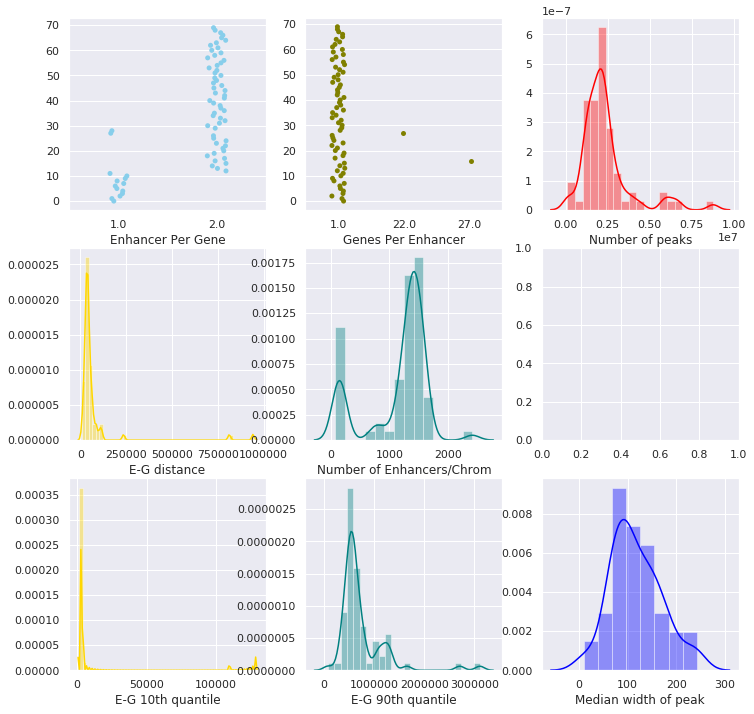

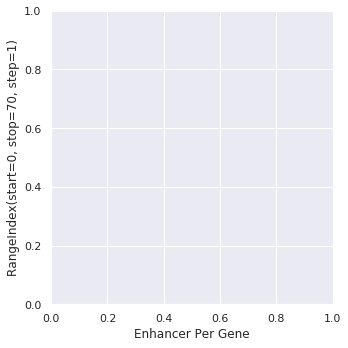

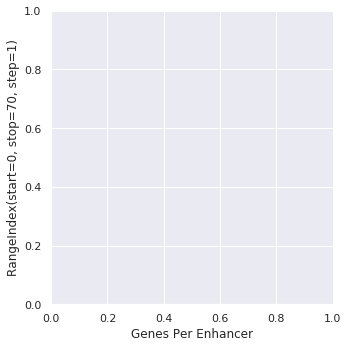

In [37]:
f, axes = plt.subplots(3, 3, figsize=(12, 12))
sns.catplot(x="Enhancer Per Gene", y=aggregate.index, data = aggregate, color="skyblue", ax=axes[0, 0])
sns.catplot(x="Genes Per Enhancer" , y=aggregate.index, data=aggregate, color="olive", ax=axes[0, 1])
sns.distplot(aggregate["E-G distance"] , color="gold", ax=axes[1, 0])
sns.distplot(aggregate["Number of Enhancers/Chrom"], color="teal", ax=axes[1, 1])
sns.distplot(aggregate["E-G 10th quantile"] , color="gold", ax=axes[2, 0])
sns.distplot(aggregate["E-G 90th quantile"], color="teal", ax=axes[2, 1])
sns.distplot(aggregate["Number of peaks"], color="red", ax=axes[0, 2])
sns.distplot(aggregate["Median width of peak"],  color="blue", ax=axes[2, 2])


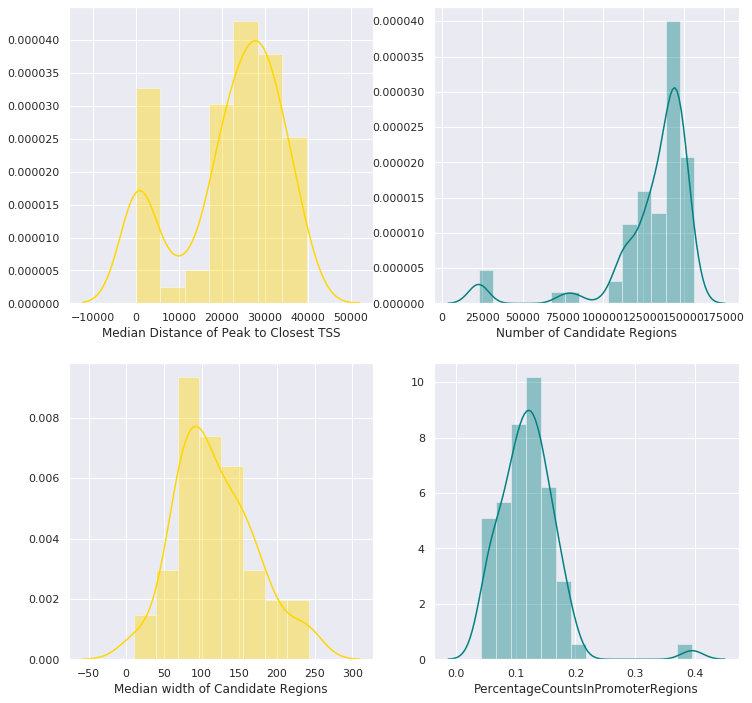

In [38]:
f, axes = plt.subplots(2, 2, figsize=(12, 12))
sns.distplot(aggregate["Median Distance of Peak to Closest TSS"] , color="gold", ax=axes[0, 0])
sns.distplot(aggregate["Number of Candidate Regions"], color="teal", ax=axes[0, 1])
sns.distplot(aggregate["Median width of Candidate Regions"] , color="gold", ax=axes[1, 0])
sns.distplot(aggregate["PercentageCountsInPromoterRegions"], color="teal", ax=axes[1, 1])


In [41]:
pickle.dump(tissue_dictionary, open("/users/kmualim/scripts/tissue_specific_bash_scripts/tissues_metrics.p", "wb"))

# pval

In [52]:
df = pd.read_csv("/oak/stanford/groups/akundaje/projects/ABC_links/plots/DistributionPlots/DiffPval_Celltypes_Metrics.tsv", sep="\t")
df1=df.drop(['PValue'], axis=1)
labels = [0.05]*14 + [0.001]*14 + [0.005]*14 + [0.1]*14
df1['Pvalue'] = labels
df1


,Number of peaks,Median width of peak,Number of Candidate Regions,Median width of Candidate Regions,Cells,Pvalue
0,240002,148.0,143282,148.0,AG04450,0.050
1,204906,143.0,138248,143.0,GM12878,0.050
2,677080,168.0,133060,168.0,GM23248,0.050
3,294575,122.0,140842,122.0,H1,0.050
4,18291359,2.0,97017,2.0,HeLaS3,0.050
5,14386302,4.0,97553,4.0,HepG2,0.050
6,530771,185.0,148276,185.0,IMR90,0.050
7,757963,150.0,138820,150.0,iPSDF19.11,0.050
8,332041,109.0,133234,109.0,iPSDF6.9,0.050
9,374341,155.0,143474,155.0,MCF7,0.050


Visual plots

# 0.05

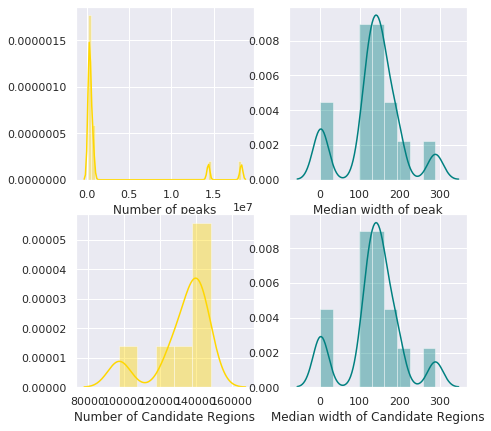

In [58]:
f, axes = plt.subplots(2, 2, figsize=(7, 7))
sns.distplot(df.loc[:13,"Number of peaks"] , color="gold", ax=axes[0, 0])
sns.distplot(df.loc[:13,"Median width of peak"], color="teal", ax=axes[0, 1])
sns.distplot(df.loc[:13,"Number of Candidate Regions"] , color="gold", ax=axes[1, 0])
sns.distplot(df.loc[:13,"Median width of Candidate Regions"], color="teal", ax=axes[1, 1])

# 0.001

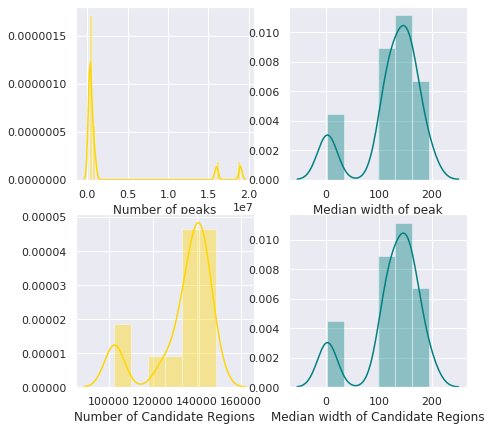

In [55]:
f, axes = plt.subplots(2, 2, figsize=(7, 7))
sns.distplot(df.loc[14:27,"Number of peaks"] , color="gold", ax=axes[0, 0])
sns.distplot(df.loc[14:27,"Median width of peak"], color="teal", ax=axes[0, 1])
sns.distplot(df.loc[14:27,"Number of Candidate Regions"] , color="gold", ax=axes[1, 0])
sns.distplot(df.loc[14:27,"Median width of Candidate Regions"], color="teal", ax=axes[1, 1])

# 0.005

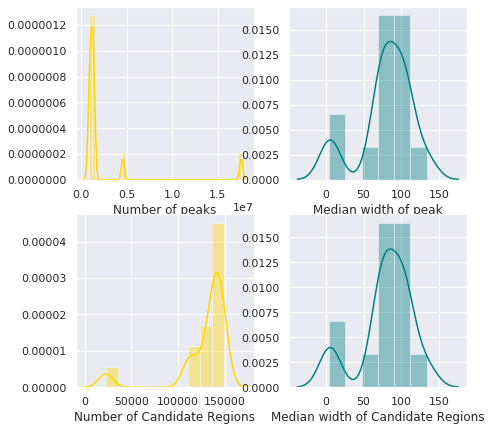

In [56]:
f, axes = plt.subplots(2, 2, figsize=(7, 7))
sns.distplot(df.loc[28:41,"Number of peaks"] , color="gold", ax=axes[0, 0])
sns.distplot(df.loc[28:41,"Median width of peak"], color="teal", ax=axes[0, 1])
sns.distplot(df.loc[28:41,"Number of Candidate Regions"] , color="gold", ax=axes[1, 0])
sns.distplot(df.loc[28:41,"Median width of Candidate Regions"], color="teal", ax=axes[1, 1])

# 0.1

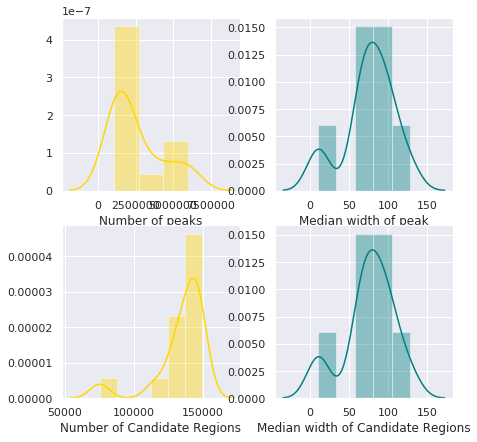

In [57]:
f, axes = plt.subplots(2, 2, figsize=(7, 7))
sns.distplot(df.loc[42:,"Number of peaks"] , color="gold", ax=axes[0, 0])
sns.distplot(df.loc[42:,"Median width of peak"], color="teal", ax=axes[0, 1])
sns.distplot(df.loc[42:,"Number of Candidate Regions"] , color="gold", ax=axes[1, 0])
sns.distplot(df.loc[42:,"Median width of Candidate Regions"], color="teal", ax=axes[1, 1])